In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('./Data/stack-overflow-developer-survey-2021/survey_results_public.csv')
df.head()

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-employed",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",18 - 24 years,"Coding Bootcamp;Other online resources (ex: videos, blogs, etc)",NaN,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0
1,2,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc);School",7,...,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN
2,3,"I am not primarily a developer, but I write code sometimes as part of my work","Student, full-time",Russian Federation,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc);Online Forum",NaN,...,18-24 years old,Man,No,Prefer not to say,Prefer not to say,None of the above,None of the above,Appropriate in length,Easy,NaN
3,4,I am a developer by profession,Employed full-time,Austria,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,NaN,NaN,...,35-44 years old,Man,No,Straight / Heterosexual,White or of European descent,I am deaf / hard of hearing,NaN,Appropriate in length,Neither easy nor difficult,NaN
4,5,I am a developer by profession,"Independent contractor, freelancer, or self-employed",United Kingdom of Great Britain and Northern Ireland,NaN,England,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,17,...,25-34 years old,Man,No,NaN,White or of European descent,None of the above,NaN,Appropriate in length,Easy,NaN


In [25]:
df_schema = pd.read_csv('./Data/stack-overflow-developer-survey-2021/survey_results_schema.csv')
print(df_schema)

       qid               qname  \
0   QID16   S0                   
1   QID12   MetaInfo             
2   QID1    S1                   
3   QID2    MainBranch           
4   QID24   Employment           
5   QID6    Country              
6   QID7    US_State             
7   QID9    UK_Country           
8   QID190  S2                   
9   QID25   EdLevel              
10  QID149  Age1stCode           
11  QID276  LearnCode            
12  QID32   YearsCode            
13  QID34   YearsCodePro         
14  QID31   DevType              
15  QID29   OrgSize              
16  QID50   Currency             
17  QID51   CompTotal            
18  QID52   CompFreq             
19  QID61   S3                   
20  QID233  Language             
21  QID262  Database             
22  QID263  Platform             
23  QID264  Webframe             
24  QID265  MiscTech             
25  QID275  ToolsTech            
26  QID274  NEWCollabTools       
27  QID71   OpSys                
28  QID243  NE

## Question 1: What are the best languages to start?

Generally, the most common languages should be the ones to start with because they are used by more companies, projects and there are larger community to support newbies on their start.\
To know the most common languages among developers, we should look at the related question.\
The question asked for the languages that developers have been using most in the past year and the language they want to work in the future.


In [26]:
pd.set_option("display.max_colwidth", -1)
print(df_schema.loc[df_schema.qname == 'Language']['question'])

20    Which <b>programming, scripting, and markup languages</b> have you done extensive development work in over the past year, and which do you want to work in over the next year? (If you both worked with the language and want to continue to do so, please check both boxes in that row.)
Name: question, dtype: object


<ipython-input-26-8170545cc492>:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option("display.max_colwidth", -1)


Here's the top 10 common answers.

In [27]:
languagePast = df['LanguageHaveWorkedWith'].value_counts().reset_index()
languagePast.rename(columns={'index': 'LanguageHaveWorkedWith', 'LanguageHaveWorkedWith': 'count'}, inplace=True)
languagePast.head(10)

,LanguageHaveWorkedWith,count
0,Python,1337
1,HTML/CSS;JavaScript;Node.js;TypeScript,811
2,Java,715
3,HTML/CSS;JavaScript;PHP;SQL,674
4,C#,597
5,C#;HTML/CSS;JavaScript;SQL,558
6,HTML/CSS;JavaScript,531
7,HTML/CSS;JavaScript;Node.js,494
8,HTML/CSS;JavaScript;TypeScript,491
9,HTML/CSS;JavaScript;Python,432


And here's the top 10 languages that they want to work with in the future.

In [28]:
languageFuture = df['LanguageWantToWorkWith'].value_counts().reset_index()
languageFuture.rename(columns={'index': 'LanguageWantToWorkWith', 'LanguageWantToWorkWith': 'count'}, inplace=True)
languageFuture.head(10)

,LanguageWantToWorkWith,count
0,Python,1389
1,Rust,821
2,HTML/CSS;JavaScript;Node.js;TypeScript,812
3,C#,700
4,Java,512
5,Go,497
6,C++;Python,392
7,Kotlin,371
8,Swift,365
9,Python;SQL,342


Because the survey allowed developers to choose more than 1 language for each question, we would like to split them up to see exactly the appearance of each language.

In [29]:
#This function is to get the list of element provided

def get_col_elements(df, col):
    '''
    INPUT:
    df - the dataset name you want to find the elements
    col - the column name you want to find the elements
    
    OUTPUT:
    new_list - a dataframe of each look_for with the count of how often it shows up 
    '''
    new_list = []
    col_list = df.dropna(subset=[col])[col].tolist()
    for val in col_list:
        sub_list = val.split(";")
        for i in range(0,len(sub_list)-1):
            if sub_list[i] not in new_list:
                new_list.append(sub_list[i]) 
    return new_list

In [30]:
possible_lang = get_col_elements(df,'LanguageHaveWorkedWith')
print(possible_lang)

['C++', 'HTML/CSS', 'JavaScript', 'Objective-C', 'PHP', 'Assembly', 'C', 'Python', 'R', 'Bash/Shell', 'C#', 'Java', 'Node.js', 'PowerShell', 'SQL', 'Ruby', 'Perl', 'Matlab', 'Kotlin', 'Julia', 'Haskell', 'Delphi', 'Go', 'Scala', 'Dart', 'Rust', 'TypeScript', 'Swift', 'Groovy', 'Clojure', 'APL', 'F#', 'LISP', 'Elixir', 'Erlang', 'Crystal', 'COBOL']


In [31]:
#This is the function to count the time each individual value appears.

def total_count(df, col, look_for):
    '''
    INPUT:
    df - the pandas dataframe you want to search
    col - the column name you want to look through
    look_for - a list of strings you want to search for in each row of df[col]
    
    OUTPUT:
    new_df - a dataframe of each look_for with the count of how often it shows up 
    '''
    countCol = [0]*len(look_for)
    new_df = pd.DataFrame(list(zip(look_for, countCol)),
               columns =['Language', 'Count Appearance'])
    col_list = df.dropna(subset=[col])[col].tolist()
    for val in look_for:
        for i in range(0,len(col_list)-1):
            if val in col_list[i].split(";"):
                new_df.loc[new_df['Language']==val, ['Count Appearance']] += 1
    new_df.sort_values('Count Appearance', ascending=False, inplace=True)
    return new_df

In [32]:
languagePast_df = total_count(df, 'LanguageHaveWorkedWith', possible_lang)
languagePast_df

,Language,Count Appearance
2,JavaScript,53586
1,HTML/CSS,46258
7,Python,39792
14,SQL,38835
11,Java,29161
12,Node.js,27975
26,TypeScript,24909
10,C#,22984
9,Bash/Shell,22385
0,C++,20057


In [33]:
languageFuture_df = total_count(df, 'LanguageWantToWorkWith', possible_lang)
languageFuture_df

,Language,Count Appearance
2,JavaScript,37007
7,Python,34929
1,HTML/CSS,29352
26,TypeScript,26904
14,SQL,26630
12,Node.js,24099
10,C#,17999
11,Java,17221
25,Rust,15865
22,Go,15788


JavaScript, HTML/CSS and Python are the top 3 languages that has been used the most and also are most desirable in the future.\
With their popularity, it is recommended for new developers to begin with those languages.

## Question 2: Should I focus on a small set of languages or should I know them all?

## Question 3: Will payment increase with seniority?

These are yet another common questions for newbies. Companies often publish Job Descriptions that require developers to have a large pool of programming languages but is that really neccessary to know them all in order to get the jobs? And do a developer with a large pool of languages often earn more than developers that spend most of their time to master a small set of languages?
To answer this question, we first need to know how many languages each developer is working on and then find the relationship between the number of languages and developers' earnings.\
It is also possible that the number of languages and earnings are impacted by the seniority of developers so we will look at the number of years they have been coding professionally.

To answer this question, the columns to be used are 'LanguageHaveWorkedWith', 'YearsCodePro', 'ConvertedCompYearly'

In [34]:
#First, we will narrow down the dataset to the columns that we will use.
df2 = df[['ResponseId','LanguageHaveWorkedWith','YearsCodePro','ConvertedCompYearly']]

In [35]:
#We will add a new column to the dataframe to count the number of current languages.
df2['NumberOfLanguages'] = df2['LanguageHaveWorkedWith'].str.count(';')+1
df2[['LanguageHaveWorkedWith','NumberOfLanguages']]

<ipython-input-35-29916932201d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['NumberOfLanguages'] = df2['LanguageHaveWorkedWith'].str.count(';')+1


,LanguageHaveWorkedWith,NumberOfLanguages
0,C++;HTML/CSS;JavaScript;Objective-C;PHP;Swift,6.0
1,JavaScript;Python,2.0
2,Assembly;C;Python;R;Rust,5.0
3,JavaScript;TypeScript,2.0
4,Bash/Shell;HTML/CSS;Python;SQL,4.0
...,...,...
83434,Clojure;Kotlin;SQL,3.0
83435,NaN,NaN
83436,Groovy;Java;Python,3.0
83437,Bash/Shell;JavaScript;Node.js;Python,4.0


Let's have a first look at the column statistics to understand it.

In [36]:
df2['NumberOfLanguages'].describe()

count    82357.000000
mean     5.373678    
std      3.090994    
min      1.000000    
25%      3.000000    
50%      5.000000    
75%      7.000000    
max      38.000000   
Name: NumberOfLanguages, dtype: float64

A histogram will help to display clearer the distribution of the number of languages that developers use.

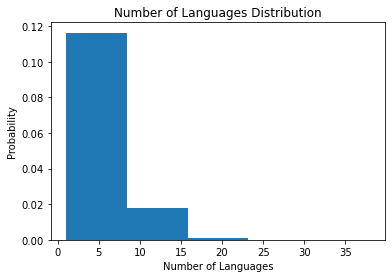

In [37]:
plt.hist(df2['NumberOfLanguages'], density=True, bins=5)
plt.ylabel('Probability')
plt.xlabel('Number of Languages')
plt.title("Number of Languages Distribution")
plt.show() 

On average, each developer use 5 languages. The most common range is from 3 to 7 languages and there are ve who use more than 15 languages.\
Let's see the relationship between number of languages and earnings.

In [38]:
#First we need to see the data types of the column to see if we need to handle categorical values.
df2.dtypes

ResponseId                int64  
LanguageHaveWorkedWith    object 
YearsCodePro              object 
ConvertedCompYearly       float64
NumberOfLanguages         float64
dtype: object

We will not work with 'LanguageHaveWorkedWith' because this column is only used to extract the number of languages. The 'YearsCodePro' column is in object type and we have to convert it to numeric in order to work with it.

In [39]:
#YearsCodePro suppose to be a numeric column. We want to see the values that can be selected in the survey to find the non-numeric answers and handle them
df2_YearsCodePro = df2.groupby('YearsCodePro')['ResponseId'].nunique()
df2_YearsCodePro

YearsCodePro
1                     3047
10                    3780
11                    1533
12                    1733
13                    1267
14                    1092
15                    2249
16                    970 
17                    770 
18                    695 
19                    392 
2                     5472
20                    1835
21                    765 
22                    653 
23                    525 
24                    435 
25                    907 
26                    321 
27                    236 
28                    222 
29                    146 
3                     5812
30                    527 
31                    156 
32                    186 
33                    148 
34                    104 
35                    256 
36                    114 
37                    91  
38                    78  
39                    43  
4                     4803
40                    152 
41                    38  
42             

In [40]:
#The non-numeric values are "Less than 1 year" and "More than 50 years". 
#The number of response for "Less than 1 year" is big and we have to retain this value. To make it numeric, we can change "Less than 1 year" to 0.5 as 0.5 is the average of the bin (0-1)
#The number of response for "More than 50 years" is very small and we can remove this as it may not affect our calculation much.
df2.loc[df2['YearsCodePro']=='Less than 1 year', ['YearsCodePro']] = '0.5'
df2 = df2[df2['YearsCodePro'] != 'More than 50 years']
#Then convert the column to numeric data type
df2['YearsCodePro'] = pd.to_numeric(df2['YearsCodePro'])

E:\Anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [41]:
#Now, we need to see if there's many N/A value in the dataset and handle them before moving on to investigate the relationship.
df2.isnull().sum(axis = 0)

ResponseId                0    
LanguageHaveWorkedWith    1072 
YearsCodePro              22223
ConvertedCompYearly       36560
NumberOfLanguages         1072 
dtype: int64

It is required to find the relationship among the number of languages, earnings and the years of coding.\
A response with N/A YearsCodePro meaning that responders either don't want to provide information or they are not working as a professional developer, hence theỉ response have little value to the question.\
A response with N/A ConvertedCompYearly meaning that the responder is not working or doesn't want to provide information, hence their responses have little value to the question as well.\
The number of N/A value for LanguageHaveWorkedWith is relatively small in comparison with the whole dataset so we can drop them, together with the N/A responses for YearsCodePro and ConvertedCompYearly.

In [42]:
df2 = df2.dropna(inplace=False)
#We can look at the dataset statistics after droping N/A values
df2.describe(include='all')

,ResponseId,LanguageHaveWorkedWith,YearsCodePro,ConvertedCompYearly,NumberOfLanguages
count,46232.000000,46232,46232.000000,4.623200e+04,46232.000000
unique,NaN,17607,NaN,NaN,NaN
top,NaN,HTML/CSS;JavaScript;Node.js;TypeScript,NaN,NaN,NaN
freq,NaN,564,NaN,NaN,NaN
mean,41087.098027,NaN,9.014708,1.186126e+05,5.310369
std,23733.451883,NaN,7.841563,5.293117e+05,2.866446
min,10.000000,NaN,0.500000,1.000000e+00,1.000000
25%,20569.750000,NaN,3.000000,2.724000e+04,3.000000
50%,41622.000000,NaN,6.000000,5.656250e+04,5.000000
75%,60627.250000,NaN,12.000000,1.000000e+05,7.000000


In [43]:
#We can look at the correlation matrix to see the relationship among 3 features and see where we should go from there
corr = df2[['NumberOfLanguages','YearsCodePro','ConvertedCompYearly']].corr()
corr

,NumberOfLanguages,YearsCodePro,ConvertedCompYearly
NumberOfLanguages,1.000000,0.029751,0.017074
YearsCodePro,0.029751,1.000000,0.059041
ConvertedCompYearly,0.017074,0.059041,1.000000


The correlation matrix suggested that there's almost no relationship among these 3 features.

<AxesSubplot:xlabel='YearsCodePro'>

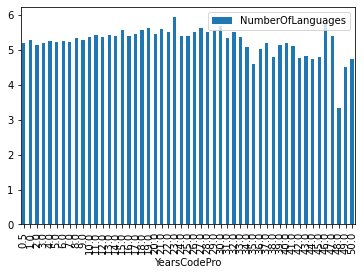

In [44]:
#Let's plot the average NumberOfLanguages and the YearsCodePro to get the clearer idea of the relationship between these 2
df2_AvgYearsCodePro = df2.groupby(['YearsCodePro'], as_index=False)['NumberOfLanguages'].mean()
df2_AvgYearsCodePro.plot.bar(x='YearsCodePro', y='NumberOfLanguages')

The plot indicate that developers on average only use around 5 languages regardless of how many year they have been coding. Higher seniority does not mean that developer have larger pool of programing language and a small set of language is good enough for their career.

<AxesSubplot:xlabel='NumberOfLanguages', ylabel='ConvertedCompYearly'>

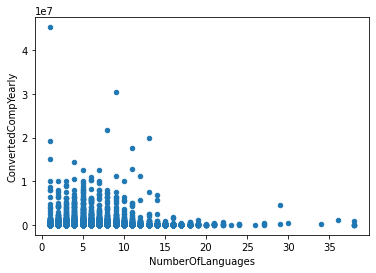

In [45]:
#Now we plot the NumberOfLanguages and the ConvertedCompYearly to get the clearer idea of the relationship between these 2
df2.plot.scatter(x='NumberOfLanguages', y='ConvertedCompYearly')

From the plot and the statistics above, we can see that the most common income range for developer is around 27240 to 100000 and it is regardless of the number of languages they use. There are a small portion of developers that earn much higher than that range but most of them use less than 15 languages. We don't see many developers who use more than 15 languages and have extra high income.

<AxesSubplot:xlabel='YearsCodePro', ylabel='ConvertedCompYearly'>

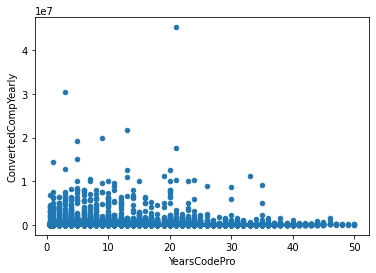

In [46]:
#Lastly, we plot the YearsCodePro and the ConvertedCompYearly to get the clearer idea of the relationship between these 2
df2.plot.scatter(x='YearsCodePro', y='ConvertedCompYearly')

Similarly, there's no clear relationship between these 2 features but we can see that the extra high income group mostly have been coding for less than 20 years.